In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
building4 = pd.read_csv("building 4.csv")

In [3]:
building4

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,5,2.0,2019-07-03 06:00:00,2019,7,3,6,0,Building4
1,9,1.0,2019-07-03 07:00:00,2019,7,3,7,0,Building4
2,13,1.0,2019-07-03 08:00:00,2019,7,3,8,0,Building4
3,17,1.0,2019-07-03 09:00:00,2019,7,3,9,0,Building4
4,21,2.0,2019-07-03 10:00:00,2019,7,3,10,0,Building4
...,...,...,...,...,...,...,...,...,...
6987,46705,1.0,2020-10-31 17:00:00,2020,10,31,17,0,Building4
6988,46709,2.0,2020-10-31 18:00:00,2020,10,31,18,0,Building4
6989,46713,1.0,2020-10-31 19:00:00,2020,10,31,19,0,Building4
6990,46717,1.0,2020-10-31 20:00:00,2020,10,31,20,0,Building4


In [4]:
building4['datetime']=pd.to_datetime(building4['datetime'], format='%Y-%m-%d %H:%M:%S')

building4= building4.set_index('datetime')

building4= building4.asfreq('H')

<AxesSubplot:xlabel='datetime'>

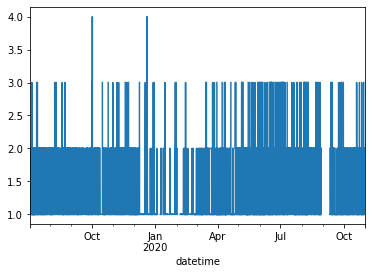

In [5]:
building4["series_value"].plot()

In [6]:
end_train='2019-12-31 23:00'

start_test='2020-01-01 00:00'

building4train = building4.loc[:end_train,:]

building4test=building4.loc[start_test:, :]

In [7]:
building4train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-07-03 06:00:00,5.0,2.0,2019.0,7.0,3.0,6.0,0.0,Building4
2019-07-03 07:00:00,9.0,1.0,2019.0,7.0,3.0,7.0,0.0,Building4
2019-07-03 08:00:00,13.0,1.0,2019.0,7.0,3.0,8.0,0.0,Building4
2019-07-03 09:00:00,17.0,1.0,2019.0,7.0,3.0,9.0,0.0,Building4
2019-07-03 10:00:00,21.0,2.0,2019.0,7.0,3.0,10.0,0.0,Building4
...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
building4test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,17465.0,1.0,2020.0,1.0,1.0,3.0,0.0,Building4
2020-01-01 04:00:00,17469.0,1.0,2020.0,1.0,1.0,4.0,0.0,Building4
...,...,...,...,...,...,...,...,...
2020-10-31 18:00:00,46709.0,2.0,2020.0,10.0,31.0,18.0,0.0,Building4
2020-10-31 19:00:00,46713.0,1.0,2020.0,10.0,31.0,19.0,0.0,Building4
2020-10-31 20:00:00,46717.0,1.0,2020.0,10.0,31.0,20.0,0.0,Building4


In [9]:
train_b4 = building4train.reset_index()[["datetime","series_value"]]
train_b4.columns=["ds","y"]
train_b4

,ds,y
0,2019-07-03 06:00:00,2.0
1,2019-07-03 07:00:00,1.0
2,2019-07-03 08:00:00,1.0
3,2019-07-03 09:00:00,1.0
4,2019-07-03 10:00:00,2.0
...,...,...
4357,2019-12-31 19:00:00,NaN
4358,2019-12-31 20:00:00,NaN
4359,2019-12-31 21:00:00,NaN
4360,2019-12-31 22:00:00,NaN


In [10]:
model_b4 = Prophet()
model_b4.fit(train_b4)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_b4 = model_b4.make_future_dataframe(periods=7320,freq="H")

In [12]:
future_b4

,ds
0,2019-07-03 06:00:00
1,2019-07-03 07:00:00
2,2019-07-03 08:00:00
3,2019-07-03 09:00:00
4,2019-07-03 10:00:00
...,...
11677,2020-10-31 19:00:00
11678,2020-10-31 20:00:00
11679,2020-10-31 21:00:00
11680,2020-10-31 22:00:00


In [13]:
forecast_b4 = model_b4.predict(future_b4)

In [14]:
forecast_b4
#forecast_b4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-03 06:00:00,1.434284,0.762848,2.050474,1.434284,1.434284,-0.049461,-0.049461,-0.049461,-0.040536,-0.040536,-0.040536,-0.008925,-0.008925,-0.008925,0.0,0.0,0.0,1.384823
1,2019-07-03 07:00:00,1.434239,0.722787,1.990615,1.434239,1.434239,-0.085318,-0.085318,-0.085318,-0.075683,-0.075683,-0.075683,-0.009635,-0.009635,-0.009635,0.0,0.0,0.0,1.348921
2,2019-07-03 08:00:00,1.434195,0.660000,1.942851,1.434195,1.434195,-0.100888,-0.100888,-0.100888,-0.090307,-0.090307,-0.090307,-0.010582,-0.010582,-0.010582,0.0,0.0,0.0,1.333306
3,2019-07-03 09:00:00,1.434150,0.703155,2.010415,1.434150,1.434150,-0.083504,-0.083504,-0.083504,-0.071763,-0.071763,-0.071763,-0.011741,-0.011741,-0.011741,0.0,0.0,0.0,1.350646
4,2019-07-03 10:00:00,1.434105,0.732834,2.012002,1.434105,1.434105,-0.048661,-0.048661,-0.048661,-0.035576,-0.035576,-0.035576,-0.013085,-0.013085,-0.013085,0.0,0.0,0.0,1.385444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11677,2020-10-31 19:00:00,1.147704,0.525862,1.855417,1.095075,1.204625,0.048406,0.048406,0.048406,0.114692,0.114692,0.114692,-0.066286,-0.066286,-0.066286,0.0,0.0,0.0,1.196110
11678,2020-10-31 20:00:00,1.147685,0.558963,1.890892,1.095048,1.204616,0.065096,0.065096,0.065096,0.129968,0.129968,0.129968,-0.064872,-0.064872,-0.064872,0.0,0.0,0.0,1.212781
11679,2020-10-31 21:00:00,1.147665,0.546732,1.859358,1.095021,1.204607,0.067367,0.067367,0.067367,0.130190,0.130190,0.130190,-0.062823,-0.062823,-0.062823,0.0,0.0,0.0,1.215032
11680,2020-10-31 22:00:00,1.147646,0.513852,1.839345,1.094994,1.204598,0.039778,0.039778,0.039778,0.099950,0.099950,0.099950,-0.060172,-0.060172,-0.060172,0.0,0.0,0.0,1.187424


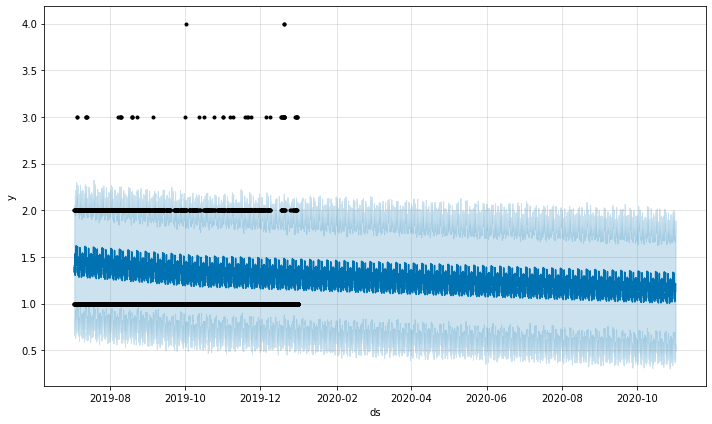

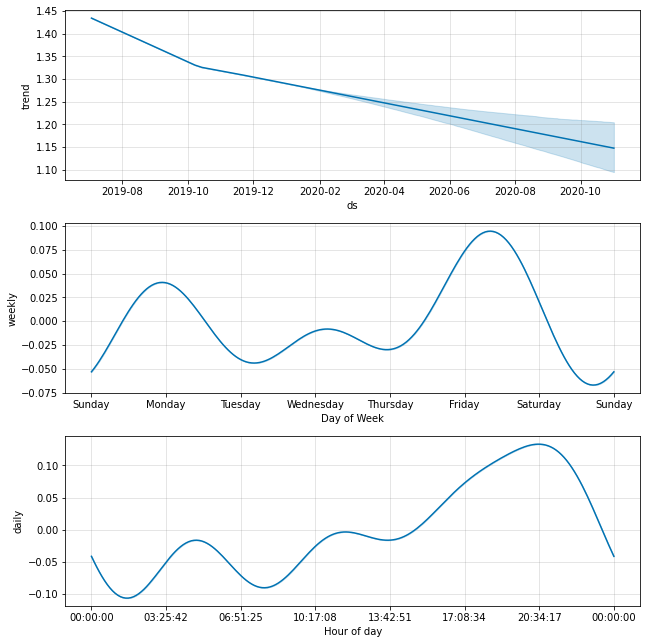

In [15]:
# plot the prediction 
fig= model_b4.plot(forecast_b4)
#plot predictions 
fig= model_b4.plot_components(forecast_b4)

In [16]:
forecast_b4["additive_terms"]
additive_terms =  pd.DataFrame(forecast_b4["additive_terms"])
additive_terms

,additive_terms
0,-0.049461
1,-0.085318
2,-0.100888
3,-0.083504
4,-0.048661
...,...
11677,0.048406
11678,0.065096
11679,0.067367
11680,0.039778


In [17]:
building4["series_value"]
actual_value = pd.DataFrame(building4.reset_index()["series_value"])
actual_value

,series_value
0,2.0
1,1.0
2,1.0
3,1.0
4,2.0
...,...
11676,2.0
11677,1.0
11678,1.0
11679,NaN


In [18]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(building4.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_b4["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 


,datetime,subtraction,additive_terms,actual_value
0,2019-07-03 06:00:00,2.049461,-0.049461,2.0
1,2019-07-03 07:00:00,1.085318,-0.085318,1.0
2,2019-07-03 08:00:00,1.100888,-0.100888,1.0
3,2019-07-03 09:00:00,1.083504,-0.083504,1.0
4,2019-07-03 10:00:00,2.048661,-0.048661,2.0
...,...,...,...,...
11675,2020-10-31 17:00:00,0.998659,0.001341,1.0
11676,2020-10-31 18:00:00,1.972695,0.027305,2.0
11677,2020-10-31 19:00:00,0.951594,0.048406,1.0
11678,2020-10-31 20:00:00,0.934904,0.065096,1.0


In [19]:
output.to_csv("b4_actual_additive.csv",index=False)